In [1]:
using Distributions, TimeIt, ProgressMeter, PyPlot, JLD
include("/home/postdoc/dsen/Desktop/G-ZZ/jl_files/zz_samplers.jl")
include("temp.jl")

run_sampler (generic function with 4 methods)

In [2]:
d, Nobs = 101, 400
pX = 1.25e-1
pξ = 1e-1
X = sprandn(d, Nobs, pX)
X[1,:] = 1
ξ_true = sprandn(d, pξ)
y = Float64.([rand(Binomial(1, 1/(1+exp(-ξ_true'X[:,j])))) for j in 1:Nobs])
save("shrinkage_data_2.4.jld", "X", X, "y", y)

In [3]:
X, y = load("shrinkage_data_2.4.jld", "X", "y")
d, Nobs = size(X)
σ02 = 1
my_pr = SS_prior(d, σ02)
my_ll = ll_logistic_sp(X,y)
my_model = model(my_ll, my_pr);

### GZZ:

In [7]:
# Sub-sampling without control variates and with weights:
mb_size = 1
max_attempts = 10^7
lambda = 2e1
Print = true;

In [8]:
start = time()
run_sampler(my_model, lambda, max_attempts, mb_size, Print) 
print("Sampling in ", round((time()-start)/60,1), " mins \n")

10 percent attempts in 32.21 min; zz bounces = 195783, hyp bounces = 4209, total time of process = 213.887 
20 percent attempts in 65.16 min; zz bounces = 389081, hyp bounces = 8574, total time of process = 427.938 
30 percent attempts in 97.68 min; zz bounces = 582700, hyp bounces = 12894, total time of process = 642.060 
40 percent attempts in 129.81 min; zz bounces = 775072, hyp bounces = 17232, total time of process = 856.367 
50 percent attempts in 161.68 min; zz bounces = 968353, hyp bounces = 21573, total time of process = 1070.400 
60 percent attempts in 193.99 min; zz bounces = 1162303, hyp bounces = 25753, total time of process = 1284.978 
70 percent attempts in 226.61 min; zz bounces = 1353281, hyp bounces = 30147, total time of process = 1499.512 
80 percent attempts in 260.35 min; zz bounces = 1541873, hyp bounces = 34592, total time of process = 1714.254 
90 percent attempts in 294.79 min; zz bounces = 1735086, hyp bounces = 38882, total time of process = 1928.504 
100 pe

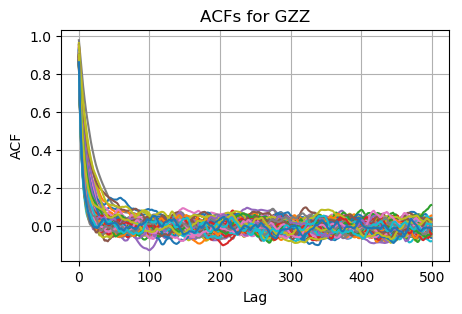

In [9]:
fig = figure("pyplot_barplot",figsize=(5,3))
n_samples = 10^4
maxlag_gzz = 500
acfs_gzz = zeros(d,maxlag_gzz)
discard = 0
filename  = "/xtmp/GZZ_data/shrinkage_prior/synthetic_data/lambda:"*string(lambda)*
            "-d:"*string(d)*"-Nobs:"*string(Nobs)*"-mb_size:"*string(mb_size)*".jld"
xt_skel, bt_skel = load(filename, "xt_skeleton", "bt_skeleton")
xi_samples_gzz = extract_samples(xt_skel[:,discard+1:end], 
                             bt_skel[:,discard+1:end], 
                            (bt_skel[end]-bt_skel[discard+1])/n_samples,
                            "linear")[:,1:end-1]
iacts_gzz = zeros(size(xi_samples_gzz,1))
for dim in 1:size(xi_samples_gzz,1)
    a = acf(xi_samples_gzz[dim,:],maxlag_gzz)
    plot(a)
    acfs_gzz[dim,:] = a
end
title("ACFs for GZZ")
xlabel("Lag")
ylabel("ACF")
grid(true)
xt_skel, bt_skel, xi_samples = [], [], []
gc()